In [60]:
import sys
from pathlib import Path
import importlib
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import sqlite3

ROOT = Path.cwd().parent
sys.path.append(str(ROOT))

import src.sentiment as smt

importlib.reload(smt)

import pandas as pd
from src.sentiment import (
    get_sentiment, label_sentiment, safe_weighted_mean
    
)

analyzer = SentimentIntensityAnalyzer()

PROCESSED_DIR = Path(ROOT) / "data" / "processed"
DB_CLEANED_PATH = PROCESSED_DIR / "sims4_cleaned.db"

print("DB path:", DB_CLEANED_PATH)
print("Exists?", DB_CLEANED_PATH.exists())

conn = sqlite3.connect(DB_CLEANED_PATH)

DB path: /Users/baderrezek/Desktop/Projects/Personal/sims4-sentiment-analysis/data/processed/sims4_cleaned.db
Exists? True


In [20]:
cleaned_df_posts = pd.read_sql_query("SELECT * FROM posts", conn)
display(cleaned_df_posts.head(5))

cleaned_df_comments = pd.read_sql_query("SELECT * FROM comments", conn)
display(cleaned_df_comments.head(5))

,post_id,created_utc,date,author,title,body,score,num_comments,permalink,subreddit,...,body_tokens,sentiment_body,sentiment_title,sentiment_post,sentiment_body_label,sentiment_title_label,sentiment_post_label,month,year,score_weighted
0,1mqbu8g,1755202474,2025-08-14 20:14:34+00:00,the-rain-witch,the cat is under the covers with her are you k...,,17469,182,https://reddit.com/r/Sims4/comments/1mqbu8g/th...,Sims4,...,,0.0000,-0.4019,-0.20095,neutral,negative,negative,2025-08-01 00:00:00,2025-01-01 00:00:00,17469
1,1mv3jnz,1755659387,2025-08-20 03:09:47+00:00,LPhamster,Welp. My 3 year old turned off my computer. Lo...,I finished making another cake house and I lov...,14991,244,https://reddit.com/r/Sims4/comments/1mv3jnz/we...,Sims4,...,finish make another cake house love forgot cli...,0.9551,0.5187,0.73690,positive,positive,positive,2025-08-01 00:00:00,2025-01-01 00:00:00,14991
2,1mtxbiy,1755548444,2025-08-18 20:20:44+00:00,NewInitiative9498,I love everything about this ridiculously big ...,I was about to sit my male Sim at the computer...,12864,191,https://reddit.com/r/Sims4/comments/1mtxbiy/i_...,Sims4,...,sit male sim computer busy notice wife get sho...,0.9461,0.7567,0.85140,positive,positive,positive,2025-08-01 00:00:00,2025-01-01 00:00:00,12864
3,1n2l1np,1756407664,2025-08-28 19:01:04+00:00,LPhamster,Does this look like a strawberry roll shortcak...,I want to continue my streak of making little ...,12458,208,https://reddit.com/r/Sims4/comments/1n2l1np/do...,Sims4,...,want continue streak make little pastry house ...,0.6648,0.3612,0.51300,positive,positive,positive,2025-08-01 00:00:00,2025-01-01 00:00:00,12458
4,1mn9ghp,1754908561,2025-08-11 10:36:01+00:00,VanessaCardui93,I got tired of tracking down fruits and veg so...,Apart from a few debug items everything is hom...,11948,582,https://reddit.com/r/Sims4/comments/1mn9ghp/i_...,Sims4,...,apart debug item everything homegrown sim home...,-0.4129,-0.4404,-0.42665,negative,negative,negative,2025-08-01 00:00:00,2025-01-01 00:00:00,11948


,comment_id,post_id,subreddit,created_utc,date,author,body,score,parent_permalink,body_clean,body_tokens,sentiment,comment_sentiment_label,month,year,score_weighted,score_w
0,fz1sdeb,hwoao3,None,1595557766,2020-07-24 02:29:26+00:00,vukette,Okay now can we bring back bonehilda for plumb...,1370,https://reddit.com/r/thesims/comments/hwoao3/t...,okay bring back bonehilda plumbella plz,okay bring back bonehilda plumbella plz,0.2960,positive,2020-07-01 00:00:00,2020-01-01 00:00:00,1370,1370
1,fz0vjeu,hwoao3,None,1595540042,2020-07-23 21:34:02+00:00,akerwoods,Justice for cowplants finally,495,https://reddit.com/r/thesims/comments/hwoao3/t...,justice cowplant finally,justice cowplant finally,0.5267,positive,2020-07-01 00:00:00,2020-01-01 00:00:00,495,495
2,fz0yakx,hwoao3,None,1595541400,2020-07-23 21:56:40+00:00,catdadsimmer,this is literally one of the cutest and wholes...,616,https://reddit.com/r/thesims/comments/hwoao3/t...,literally one cut wholesome moment sim,literally one cut wholesome moment sim,0.5859,positive,2020-07-01 00:00:00,2020-01-01 00:00:00,616,616
3,fz16el9,hwoao3,None,1595545544,2020-07-23 23:05:44+00:00,yoop1001,aww i'm so happy for kelly 💗,351,https://reddit.com/r/thesims/comments/hwoao3/t...,aww happy kelly,aww happy kelly,0.8920,positive,2020-07-01 00:00:00,2020-01-01 00:00:00,351,351
4,fz182vo,hwoao3,None,1595546413,2020-07-23 23:20:13+00:00,taikodragonqueen,Seeing her joy at this was so very much wholes...,251,https://reddit.com/r/thesims/comments/hwoao3/t...,see joy much wholesome good bean,see joy much wholesome good bean,0.7717,positive,2020-07-01 00:00:00,2020-01-01 00:00:00,251,251


## Basic Sentiment analysis and EDA

In [11]:
cleaned_df_posts["sentiment_body"] = cleaned_df_posts["body"].apply(smt.get_sentiment)
cleaned_df_posts["sentiment_title"] = cleaned_df_posts["title"].apply(smt.get_sentiment)
cleaned_df_posts["sentiment_post"] = cleaned_df_posts[["sentiment_title","sentiment_body"]].mean(axis=1)

cleaned_df_comments["sentiment"] = cleaned_df_comments["body"].apply(smt.get_sentiment)

In [12]:
cleaned_df_posts["sentiment_body_label"]  = cleaned_df_posts["sentiment_body"].apply(label_sentiment)
cleaned_df_posts["sentiment_title_label"] = cleaned_df_posts["sentiment_title"].apply(label_sentiment)
cleaned_df_posts["sentiment_post_label"]  = cleaned_df_posts["sentiment_post"].apply(label_sentiment)

cleaned_df_comments["comment_sentiment_label"]    = cleaned_df_comments["sentiment"].apply(label_sentiment)

In [13]:
print(cleaned_df_posts["sentiment_body_label"].value_counts(normalize=True))
print(cleaned_df_posts["sentiment_title_label"].value_counts(normalize=True))
print(cleaned_df_posts["sentiment_post_label"].value_counts(normalize=True))
print(cleaned_df_comments["comment_sentiment_label"].value_counts(normalize=True))

sentiment_body_label
neutral     0.573015
positive    0.298601
negative    0.128385
Name: proportion, dtype: float64
sentiment_title_label
neutral     0.429875
positive    0.348038
negative    0.222087
Name: proportion, dtype: float64
sentiment_post_label
positive    0.495589
neutral     0.262702
negative    0.241710
Name: proportion, dtype: float64
comment_sentiment_label
positive    0.531711
neutral     0.255783
negative    0.212506
Name: proportion, dtype: float64


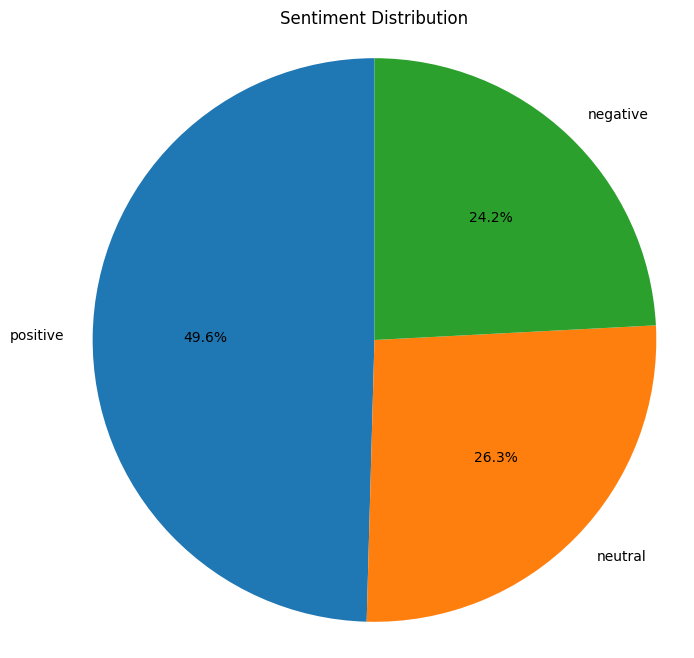

In [15]:
# pie chart showing the number of positive, negative, and neutral sentiments
import matplotlib.pyplot as plt

sentiment_counts = cleaned_df_posts["sentiment_post_label"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution")
plt.axis('equal') 
plt.show()

#TODO: Despite there being 49.6% positive sentiment, the data may be skewed by negative sarcastic posts, or other factors.

subreddit
Sims4      0.103754
thesims    0.098215
Name: sentiment_post, dtype: float64


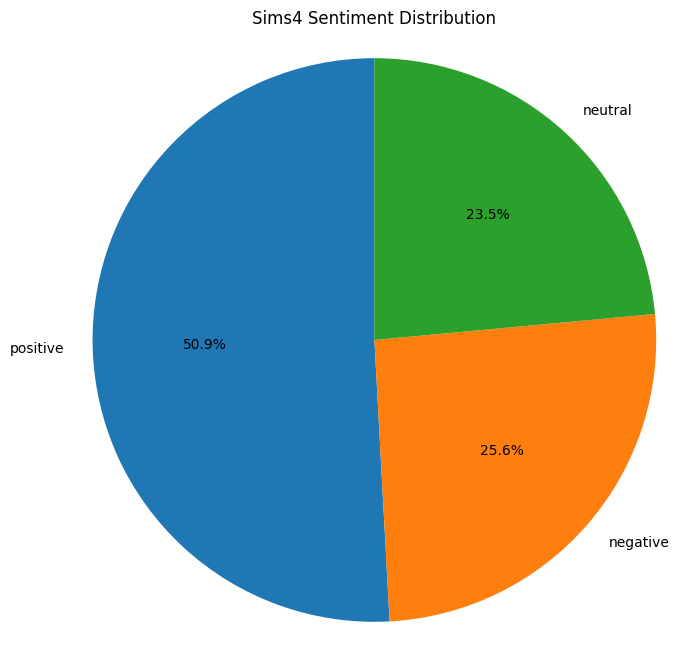

(np.float64(-1.0999993189719421),
 np.float64(1.0999990782852376),
 np.float64(-1.099999368595897),
 np.float64(1.099999969933138))

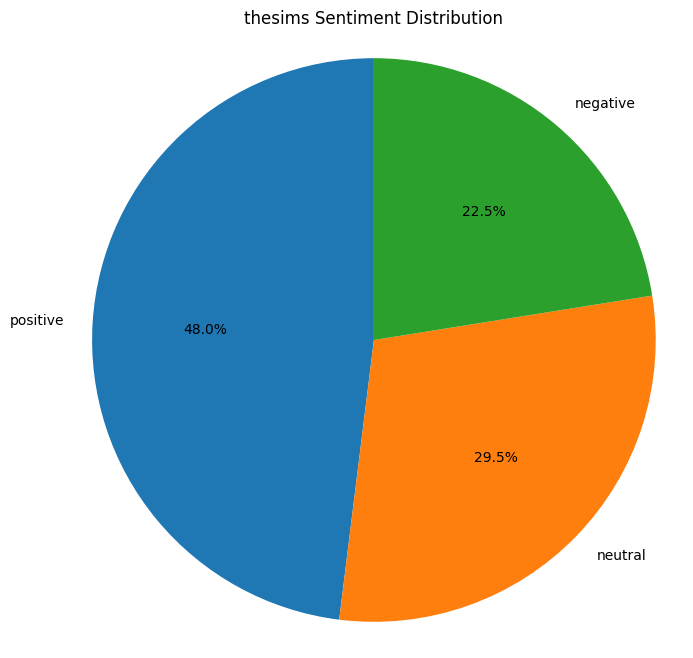

In [16]:
# Average post sentiment per subreddit
average_post_sentiment = cleaned_df_posts.groupby("subreddit")["sentiment_post"].mean()
print(average_post_sentiment)

# Pie charts of each subreddit by labels

# Sims4 subreddit
sims4_sentiment_counts = cleaned_df_posts[cleaned_df_posts["subreddit"] == "Sims4"]["sentiment_post_label"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sims4_sentiment_counts, labels=sims4_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Sims4 Sentiment Distribution")
plt.axis('equal') 
plt.show()

# thesims subreddit
thesims_sentiment_counts = cleaned_df_posts[cleaned_df_posts["subreddit"] == "thesims"]["sentiment_post_label"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(thesims_sentiment_counts, labels=thesims_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("thesims Sentiment Distribution")
plt.axis('equal') 

In [17]:
# Print the most positive post body
most_positive_post_body = cleaned_df_posts.loc[cleaned_df_posts["sentiment_body"].idxmax()]
print("Most Positive Post:")
print("Title:", most_positive_post_body["title"], "\nBody:", most_positive_post_body["body"], "\nSentiment:", most_positive_post_body["sentiment_body"])


# TODO: Talk about how despite this being the most positive post, its actually just about how a user filled a gap that existed in the gameplay. This shows that even positive sentiments can stem from a place of frustration or unmet needs within the game.

Most Positive Post:
Title: I did EAs job for them and created a hypothetical teen-centered game pack. 
Body: Edit: Yall thanks for the kind words lol Spent a long time on this so I'm glad you liked my ideas. Since I have to much time on my hands (and I'm a Creative Writing major/Marketing minor) I love this kind of stuff. If you have any ideas for packs you'd like please tell me id love more excuses to make these sorta posts on here <3

&#x200B;

Teens need more in-game. They basically are just adults who don't work and it's really sad. I think teens could be one of the best life stages to play but there as of now just isn't enough for them to do. So I tried to brainstorm some ideas for a game pack based on them. Would love to hear your thoughts! If you have more ideas please tell me!

I wanted the main selling point for this pack to be an all-new group of teen-only aspirations, jobs, events, and interactions. This focuses more on the gameplay between teens than it does their interacti

In [18]:
# Print the most negative post body
most_negative_post_body = cleaned_df_posts.loc[cleaned_df_posts["sentiment_body"].idxmin()]
print("Most Negative Post Body:")
print("Title:", most_negative_post_body["title"], "\nBody:", most_negative_post_body["body"], "\nSentiment:", most_negative_post_body["sentiment_body"])

Most Negative Post Body:
Title: I’m pissed off, and now I have a list of demands for the next Sims game 
Body: Disclaimer: this post is slightly tongue-in-cheek, but does convey my thoughts on what I think should be prioritized for The Sims 5, assuming it gets made. Also, this post will be _laden_ with profanity - you’ve been warned

Something that has remained a constant throughout the Sims series is that Sims do all kinds of stupid shit to _piss you off_. The Sims 4 is better about this in some regards, but worse in others. This all became very clear to me during a bit of a marathon Sims 4 session yesterday, playing a family that consisted of two married sims and their three pairs of twins, where I became more and more frustrated throughout the day. Apologies to my neighbors, who probably now think I’m verbally abusing a mute person who lives with me as they sporadically hear me scream things like “NO! Put down the fucking bowl NOW and go to the fucking bathroom, you stupid cunt!”

A

In [19]:
# Plotting sentiments over time using the sentiment.py functions

for df in (cleaned_df_posts, cleaned_df_comments):
    if "date" in df.columns:
        df["month"] = pd.to_datetime(df["date"], errors="coerce").dt.to_period("M").dt.to_timestamp()
        df["year"] = pd.to_datetime(df["date"], errors="coerce").dt.to_period("Y").dt.to_timestamp()


# posts per month including average sentiment and the sentiment label using label_sentiment()
posts_month = (cleaned_df_posts
               .groupby("month", dropna=True)["sentiment_post"]
               .mean()
               .reset_index(name="avg_sentiment_posts"))

posts_month["sentiment_label"] = posts_month["avg_sentiment_posts"].apply(label_sentiment)


comments_month = (cleaned_df_comments
                  .groupby("month", dropna=True)["sentiment"]
                  .mean()
                  .reset_index(name="avg_sentiment_comments"))

comments_month["sentiment_label"] = comments_month["avg_sentiment_comments"].apply(label_sentiment)

# posts per year including average sentiment and the sentiment label
posts_year = (cleaned_df_posts
              .groupby("year", dropna=True)["sentiment_post"]
              .mean()
              .reset_index(name="avg_sentiment_posts_year"))

posts_year["sentiment_label"] = posts_year["avg_sentiment_posts_year"].apply(label_sentiment)

comments_year = (cleaned_df_comments
                 .groupby("year", dropna=True)["sentiment"]
                 .mean()
                 .reset_index(name="avg_sentiment_comments_year"))

comments_year["sentiment_label"] = comments_year["avg_sentiment_comments_year"].apply(label_sentiment)

print("Average Sentiment (Posts) per Year:")
display(posts_year)
print("\nAverage Sentiment (Comments) per Year:")
display(comments_year)


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47828/1726988111.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = pd.to_datetime(df["date"], errors="coerce").dt.to_period("M").dt.to_timestamp()
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47828/1726988111.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year"] = pd.to_datetime(df["date"], errors="coerce").dt.to_period("Y").dt.to_timestamp()
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47828/1726988111.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = pd.to_datetime(df["date"], errors="coerce").dt.to_period("M").dt.to_timestamp()


Average Sentiment (Posts) per Year:


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47828/1726988111.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year"] = pd.to_datetime(df["date"], errors="coerce").dt.to_period("Y").dt.to_timestamp()


,year,avg_sentiment_posts_year,sentiment_label
0,2018-01-01,0.134955,positive
1,2019-01-01,0.076712,positive
2,2020-01-01,0.081142,positive
3,2021-01-01,0.064601,positive
4,2022-01-01,0.024245,neutral
5,2023-01-01,0.025610,neutral
6,2024-01-01,0.059797,positive
7,2025-01-01,0.147038,positive



Average Sentiment (Comments) per Year:


,year,avg_sentiment_comments_year,sentiment_label
0,2018-01-01,0.162624,positive
1,2019-01-01,0.215078,positive
2,2020-01-01,0.230004,positive
3,2021-01-01,0.229017,positive
4,2022-01-01,0.186274,positive
5,2023-01-01,0.179606,positive
6,2024-01-01,0.195492,positive
7,2025-01-01,0.212770,positive


In [20]:
# Plotting sentiments over time using the sentiment.py functions

for df in (cleaned_df_posts, cleaned_df_comments):
    if "date" in df.columns:
        df["month"] = pd.to_datetime(df["date"], errors="coerce").dt.to_period("M").dt.to_timestamp()

posts_month = (cleaned_df_posts
               .groupby("month", dropna=True)["sentiment_post"]
               .mean()
               .reset_index(name="avg_sentiment_posts"))


comments_month = (cleaned_df_comments
                  .groupby("month", dropna=True)["sentiment"]
                  .mean()
                  .reset_index(name="avg_sentiment_comments"))

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47828/960265678.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = pd.to_datetime(df["date"], errors="coerce").dt.to_period("M").dt.to_timestamp()
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47828/960265678.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = pd.to_datetime(df["date"], errors="coerce").dt.to_period("M").dt.to_timestamp()


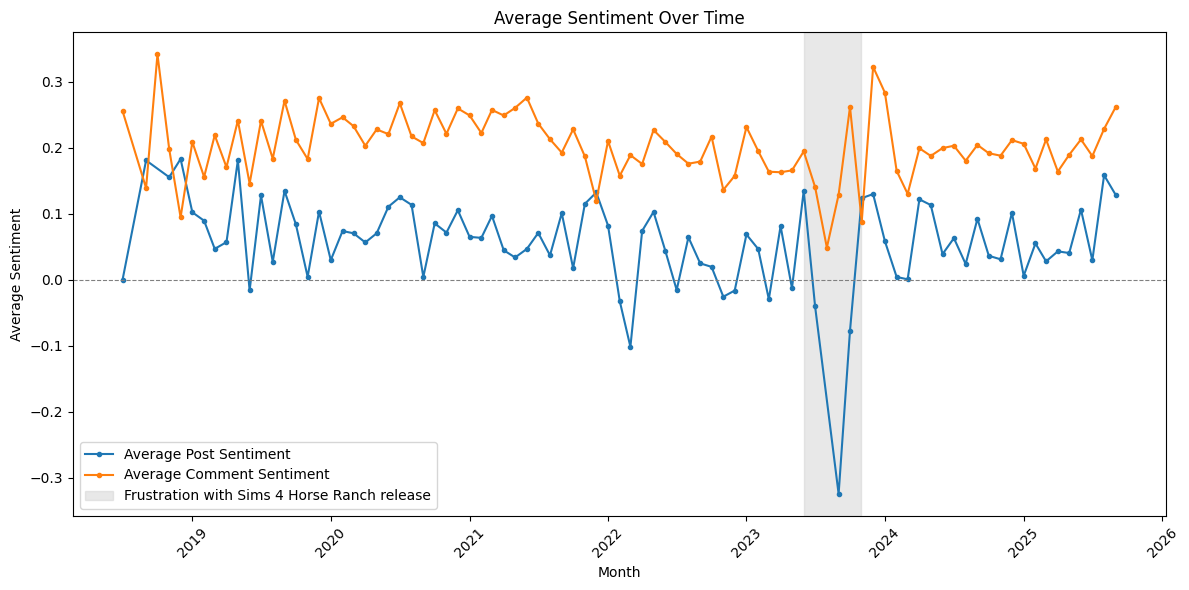

In [22]:
# plotting sentiment
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(posts_month["month"], posts_month["avg_sentiment_posts"], label="Average Post Sentiment", marker=".")
plt.plot(comments_month["month"], comments_month["avg_sentiment_comments"], label="Average Comment Sentiment", marker=".")

# shaded vertical line from june to october 2023 and a label
plt.axvspan(pd.Timestamp("2023-06-01"), pd.Timestamp("2023-10-31"), color="lightgray", alpha=0.5, label='Frustration with Sims 4 Horse Ranch release')

plt.axhline(0, linestyle="--", linewidth=0.8, color="gray")

plt.title("Average Sentiment Over Time")
plt.xlabel("Month")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# TODO: Talk about the impact of the Sims 4 Horse Ranch release on player sentiment

In [23]:
"""
We are using weighted averages of the 'score' column which is a measure of reddit's upvotes - downvotes system.
The negative sentiments that have a higher score may mean that many people agree with that post. 
"""


# add safe weights
cleaned_df_posts["score_weighted"]    = cleaned_df_posts["score"].fillna(0)
cleaned_df_comments["score_weighted"] = cleaned_df_comments["score"].fillna(0)

# weighted monthly
posts_month_w = (cleaned_df_posts
                 .groupby("month")
                 .apply(lambda g: safe_weighted_mean(g["sentiment_post"], g["score_weighted"]))
                 .reset_index(name="avg_sentiment_posts_weighted"))

comments_month_w = (cleaned_df_comments
                    .groupby("month")
                    .apply(lambda g: safe_weighted_mean(g["sentiment"], g["score_weighted"]))
                    .reset_index(name="avg_sentiment_comments_weighted"))


# weighted yearly
posts_year_w = (cleaned_df_posts
                .groupby("year")
                .apply(lambda g: safe_weighted_mean(g["sentiment_post"], g["score_weighted"]))
                .reset_index(name="avg_sentiment_posts_year_weighted"))

posts_year_w["sentiment_label"] = posts_year_w["avg_sentiment_posts_year_weighted"].apply(label_sentiment)

comments_year_w = (cleaned_df_comments
                   .groupby("year")
                   .apply(lambda g: safe_weighted_mean(g["sentiment"], g["score_weighted"]))
                   .reset_index(name="avg_sentiment_comments_year_weighted"))

comments_year_w["sentiment_label"] = comments_year_w["avg_sentiment_comments_year_weighted"].apply(label_sentiment)


print("Weighted Average Sentiment (Posts):")
display(posts_year_w)
print("\nWeighted Average Sentiment (Comments):")
display(comments_year_w)

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47828/3283001368.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: safe_weighted_mean(g["sentiment_post"], g["score_weighted"]))


Weighted Average Sentiment (Posts):


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47828/3283001368.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: safe_weighted_mean(g["sentiment"], g["score_weighted"]))
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47828/3283001368.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: safe_weighted_mean(g["sentiment_post"], g["score_weighted"]))
/var/fold

,year,avg_sentiment_posts_year_weighted,sentiment_label
0,2018-01-01,0.130596,positive
1,2019-01-01,0.072674,positive
2,2020-01-01,0.077273,positive
3,2021-01-01,0.065929,positive
4,2022-01-01,0.028041,neutral
5,2023-01-01,0.019514,neutral
6,2024-01-01,0.055815,positive
7,2025-01-01,0.053478,positive



Weighted Average Sentiment (Comments):


,year,avg_sentiment_comments_year_weighted,sentiment_label
0,2018-01-01,0.045725,neutral
1,2019-01-01,0.164938,positive
2,2020-01-01,0.180924,positive
3,2021-01-01,0.183699,positive
4,2022-01-01,0.151693,positive
5,2023-01-01,0.105342,positive
6,2024-01-01,0.148867,positive
7,2025-01-01,0.138317,positive


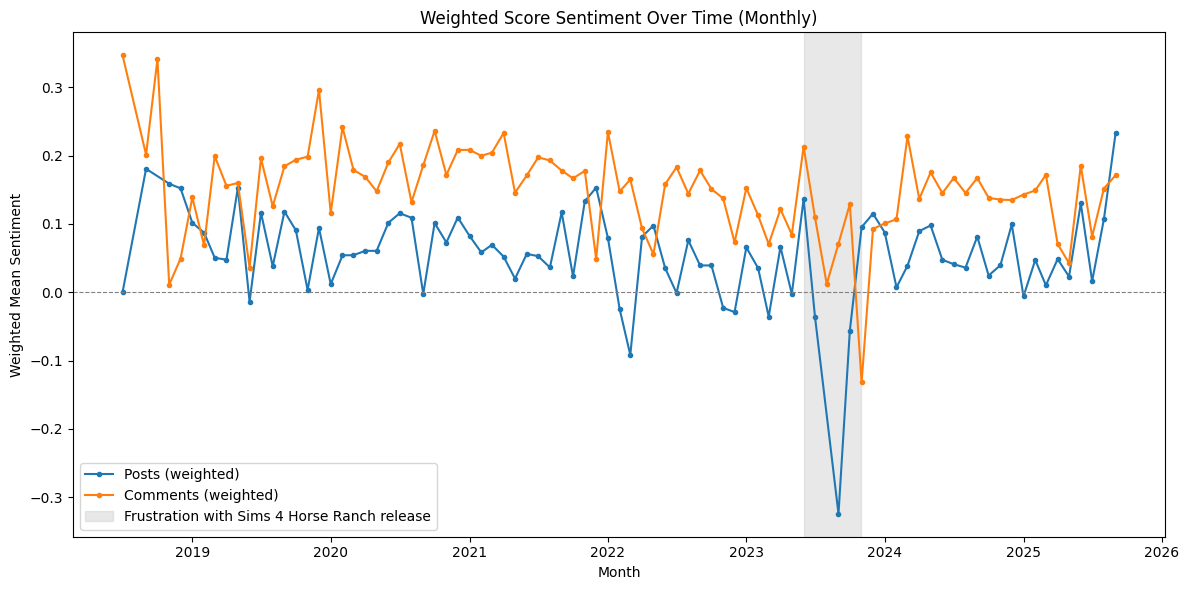

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(posts_month_w["month"], posts_month_w["avg_sentiment_posts_weighted"], label="Posts (weighted)", marker=".")
plt.plot(comments_month_w["month"], comments_month_w["avg_sentiment_comments_weighted"], label="Comments (weighted)", marker=".")
plt.axhline(0, linestyle="--", linewidth=0.8, color="gray")

# shaded vertical line from june to october 2023 and a label
plt.axvspan(pd.Timestamp("2023-06-01"), pd.Timestamp("2023-10-31"), color="lightgray", alpha=0.5, label='Frustration with Sims 4 Horse Ranch release')

plt.title("Weighted Score Sentiment Over Time (Monthly)")
plt.xlabel("Month"); plt.ylabel("Weighted Mean Sentiment"); plt.legend(); plt.tight_layout()
plt.show()

In [25]:
cleaned_df_comments["score_w"] = (
    pd.to_numeric(cleaned_df_comments["score"], errors="coerce")
    .fillna(0).clip(lower=0)
)

agg_comments = (
    cleaned_df_comments.groupby("post_id")
    .apply(lambda g: pd.Series({
        "comment_sentiment_mean": g["sentiment"].mean(),
        "comment_sentiment_wmean": safe_weighted_mean(g["sentiment"], g["score_w"]),
        "n_comments": g.shape[0]
    }))
    .reset_index()
)

posts_w_comm = cleaned_df_posts.merge(agg_comments, on="post_id", how="left")
posts_w_comm[["post_id","title","sentiment_body","n_comments","comment_sentiment_mean","comment_sentiment_wmean"]].head(3)

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47828/67791958.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,post_id,title,sentiment_body,n_comments,comment_sentiment_mean,comment_sentiment_wmean
0,1mqbu8g,the cat is under the covers with her are you k...,0.0000,180.0,0.273872,0.206830
1,1mv3jnz,Welp. My 3 year old turned off my computer. Lo...,0.9551,242.0,0.329459,0.444603
2,1mtxbiy,I love everything about this ridiculously big ...,0.9461,191.0,0.269687,0.089946


In [26]:
# Best/Worst Examples

# Top 10 most positive posts + permalinks. filtered by engagement (only keep score ≥ 10 or n_comments ≥ 5).
positive_posts = posts_w_comm[
    (posts_w_comm["score"] >= 10) | (posts_w_comm["n_comments"] >= 5)
].nlargest(10, "comment_sentiment_wmean")

# Top 10 most negative posts + permalinks. filtered by engagement (only keep score ≥ 10 or n_comments ≥ 5).
negative_posts = posts_w_comm[
    (posts_w_comm["score"] >= 10) | (posts_w_comm["n_comments"] >= 5)
].nsmallest(10, "comment_sentiment_wmean")


print("Top 10 Most Positive Posts (by Comment Sentiment):")
display(positive_posts[["post_id", "title", "body", "comment_sentiment_wmean", "score_weighted"]])
print("\nTop 10 Most Negative Posts (by Comment Sentiment):")
display(negative_posts[["post_id", "title", "body", "comment_sentiment_wmean", "score_weighted"]])


# TODO: Talk about how some comments are very negative because they mention sims dying which is a part of gameplay. This means some sentiments may be skewed by the context of the game.

Top 10 Most Positive Posts (by Comment Sentiment):


,post_id,title,body,comment_sentiment_wmean,score_weighted
3788,1muwgyj,Growing Together should have more activities l...,,0.952678,84
3412,1mzgsc2,Super Sim Challenge,"I want to start the Super Sim challenge, but I...",0.914213,4
487,1n4z3yv,Forever World,"A few days ago, I asked for advice on how not ...",0.907810,125
997,1mlv272,part 5 of my comic!,,0.897900,27
780,1mrk79l,Ceramics Studio/Retail Shop Build.,Let me know what you guys think. While I’ve fi...,0.897300,44
970,1minzah,I usually don't capture moments in my sims' li...,I noticed the aunt of my legacy family heir di...,0.871840,30
3086,1n1r059,How are you playing with faries?,I just completed the nature's calling event an...,0.870179,3
975,1n1x5t9,Eco Home Barn Conversion,The story behind this build was a student just...,0.869360,28
2871,1n6615n,look at her face 😭 she's never playing with he...,she does not look happy LOL,0.865800,10
799,1n5ua5r,Eliza wtf he's barely one year old???,,0.865800,46



Top 10 Most Negative Posts (by Comment Sentiment):


,post_id,title,body,comment_sentiment_wmean,score_weighted
2875,1n67dfx,Can My Sims Die From Catching On Fire?,The other day my sims daughter and husband wer...,-0.698194,3
832,1n26cta,"She's not even playful this time, come on!",Look at my stupid fucking sim dying of laughte...,-0.658143,41
4573,1foozyw,Cute and sad at the same time,,-0.657075,7471
3742,1n1e91y,obsessed with this sim..,Father is Brent Hecking and mother is my own sim.,-0.650594,141
3911,1mpwume,Why do sims choose the most random places to s...,\nAloysius: lord of the manor with a dozen bed...,-0.633954,39
1027,1gt9c0m,"This description is making fun of ai ""art"" lmao.",,-0.593094,9336
4245,1mo3fu5,What's the strangest way one of your Sims kill...,I used my own answer as a reply to a different...,-0.585600,5
4072,1n678bd,sims 4 gallery has been shit recently,anybody having the same issues with freezing g...,-0.573787,25
4257,1mgxudh,I have never seen this before lol,I saw this and I cackled lol.,-0.544175,6
3056,1n2nv5m,What if the next EP had cars in it ?,"Hello,\nI was playing with Business and hobbie...",-0.535292,0


<Axes: xlabel='score', ylabel='sentiment_post'>

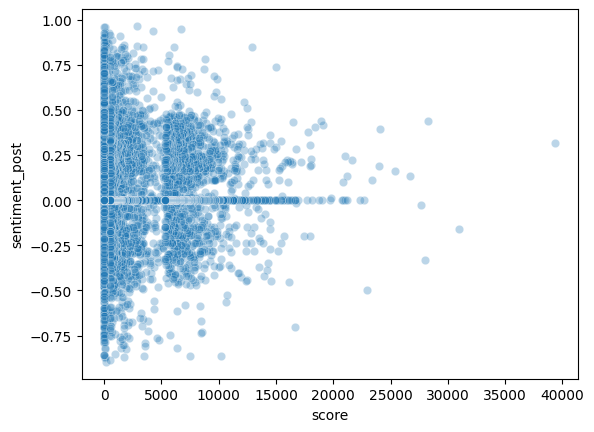

In [27]:
import seaborn as sns
sns.scatterplot(
    data=cleaned_df_posts,
    x="score", y="sentiment_post", alpha=0.3
)

# TODO: Explain how this side facing T tells us that the majority of posts dont go viral because of their sentiment, they moreso may be relatable or capture the attention of the audience. 

In [ ]:
# insert sentiments and sentiment labels into sims4_cleaned.db

cleaned_df_posts.to_sql("posts", conn, if_exists="replace", index=False)
cleaned_df_comments.to_sql("comments", conn, if_exists="replace", index=False)
conn.close()


## Sarcasm sensitive sentiment analysis and EDA

In [26]:
# --- setup
import re
import sys
import torch
import importlib
import numpy as np
from pathlib import Path
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

ROOT = Path.cwd().parent
sys.path.append(str(ROOT))

import src.sentiment as smt

importlib.reload(smt)

from src.sentiment import (
    batched, predict_sentiment, predict_sarcasm, effective_negativity, score_texts, preprocess, score_batch_to_df
)

In [13]:
# --- models (social-media tuned, good for Reddit/Twitter tone)
SENT_MODEL_NAME = "cardiffnlp/twitter-roberta-base-sentiment"   # labels: [negative, neutral, positive]
SARC_MODEL_NAME = "cardiffnlp/twitter-roberta-base-irony"       # labels: [non_irony, irony]

sent_tok = AutoTokenizer.from_pretrained(SENT_MODEL_NAME)
sent_mdl = AutoModelForSequenceClassification.from_pretrained(SENT_MODEL_NAME).eval()

sarc_tok = AutoTokenizer.from_pretrained(SARC_MODEL_NAME)
sarc_mdl = AutoModelForSequenceClassification.from_pretrained(SARC_MODEL_NAME).eval()

SENT_LABELS = ["negative", "neutral", "positive"]
SARC_LABELS = ["non_irony", "irony"]

In [16]:
# --- example

demo = [
    "Game keeps freezing after the patch. Totally not broken at all 🙃",
    "Did EA's job for them and made a pack that actually works.",
    "Great patch, everything feels smoother now!",
    "My save got corrupted again. Please fix this."
]

out = score_texts(demo, batch_size=4)

for txt, nr, ne, psarc in zip(demo, out["neg_raw"], out["neg_effective"], out["sarcasm_prob"]):
    print(f"\n{txt}\nneg_raw={nr:.3f}  neg_effective={ne:.3f}  sarcasm={psarc:.2f}")


Game keeps freezing after the patch. Totally not broken at all 🙃
neg_raw=0.390  neg_effective=0.377  sarcasm=0.08

Did EA's job for them and made a pack that actually works.
neg_raw=-0.839  neg_effective=-0.226  sarcasm=0.95

Great patch, everything feels smoother now!
neg_raw=-0.977  neg_effective=-0.710  sarcasm=0.36

My save got corrupted again. Please fix this.
neg_raw=0.884  neg_effective=0.840  sarcasm=0.09


In [40]:
# make a new column in the df called full_post which is the title on top of the body
cleaned_df_posts["full_post"] = cleaned_df_posts["title"] + ":\n" + cleaned_df_posts["body"]

post_and_score_df = score_batch_to_df(cleaned_df_posts["full_post"])

display(post_and_score_df)

,text,neg_prob,neu_prob,pos_prob,sarcasm_prob,neg_raw,neg_effective
0,the cat is under the covers with her are you k...,0.221770,0.611407,0.166823,0.071126,0.054947,0.059519
1,Welp. My 3 year old turned off my computer. Lo...,0.025228,0.075202,0.899570,0.048953,-0.874342,-0.841625
2,I love everything about this ridiculously big ...,0.007088,0.032331,0.960581,0.103234,-0.953493,-0.879188
3,Does this look like a strawberry roll shortcak...,0.355312,0.527494,0.117194,0.050018,0.238118,0.235379
4,I got tired of tracking down fruits and veg so...,0.020656,0.222478,0.756866,0.046406,-0.736209,-0.709362
...,...,...,...,...,...,...,...
6569,Sims Propaganda I AM NOT FALLING FOR!:\nThis i...,0.560415,0.362879,0.076706,0.056161,0.483709,0.471667
6570,Sim Character Ideas?:\nIm renovation my whole ...,0.004167,0.175297,0.820536,0.025917,-0.816370,-0.800026
6571,Is there a way to filter out event-exclusive i...,0.790097,0.179182,0.030721,0.038949,0.759375,0.744045
6572,"entrepreneurial trait fix?:\nhello, \n\ni gave...",0.282801,0.501533,0.215665,0.244376,0.067136,0.080910


In [84]:
# Display the most negative post adjusting for sarcasm, and its probabilities

most_negative = post_and_score_df.loc[post_and_score_df["neg_effective"].idxmax()]

print(f"Most negative post:\n{most_negative['text']}")
print(f"Probabilities:")
print(f"  Negative: {most_negative['neg_prob']:.3f}")                   # Likelihood of negativity
print(f"  Neutral: {most_negative['neu_prob']:.3f}")                    # Likelihood of neutrality
print(f"  Positive: {most_negative['pos_prob']:.3f}")                   # Likelihood of positivity
print(f"  Sarcasm: {most_negative['sarcasm_prob']:.3f}")                # Likelihood of sarcasm
print(f"  Neg Raw: {most_negative['neg_raw']:.3f}")                     # Negative score adjusting for positive score
print(f"  Neg Effective: {most_negative['neg_effective']:.3f}")         # Negative score adjusting for sarcasm


Most negative post:
Imma have to say no, the risk of randomly burning to death while making a salad is just far too high for me:

Probabilities:
  Negative: 0.970
  Neutral: 0.027
  Positive: 0.002
  Sarcasm: 0.024
  Neg Raw: 0.968
  Neg Effective: 0.955


In [44]:
# Display the most positive post

most_positive = post_and_score_df.loc[post_and_score_df["pos_prob"].idxmax()]

print(f"Most positive post:\n{most_positive['text']}")
print(f"Probabilities:")
print(f"  Negative: {most_positive['neg_prob']:.3f}")                   # Likelihood of negativity
print(f"  Neutral: {most_positive['neu_prob']:.3f}")                    # Likelihood of neutrality
print(f"  Positive: {most_positive['pos_prob']:.3f}")                   # Likelihood of positivity
print(f"  Sarcasm: {most_positive['sarcasm_prob']:.3f}")                # Likelihood of sarcasm
print(f"  Neg Raw: {most_positive['neg_raw']:.3f}")                     # Negative score adjusting for positive score
print(f"  Neg Effective: {most_positive['neg_effective']:.3f}")         # Negative score adjusting for sarcasm


Most positive post:
Obsessed with my sim family.:
My sim, Zima, is the first sim in a long time who I've been really in love with. Her and her husband are adorable, their daughter is so precious, I put a lot of love into building their home and it's just so sweet. Even her best friends from her childhood are still her closest friends, and they're friends with her family and she's friends with theirs. In fact, her daughter and her best friend's son are best friends right now. I love them a lot. 

Here are some pictures from her teen, young adult, and adult years! 
Probabilities:
  Negative: 0.001
  Neutral: 0.006
  Positive: 0.993
  Sarcasm: 0.069
  Neg Raw: -0.991
  Neg Effective: -0.940


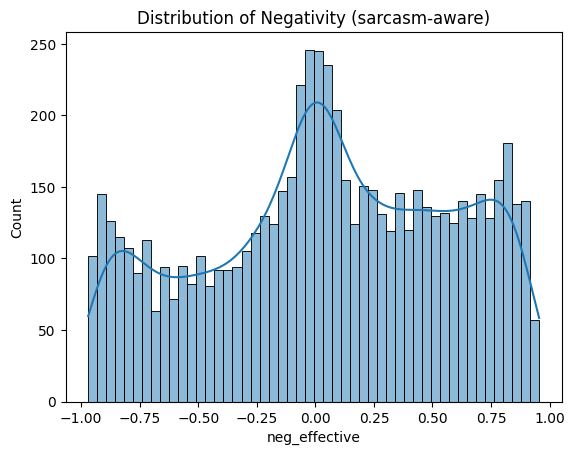

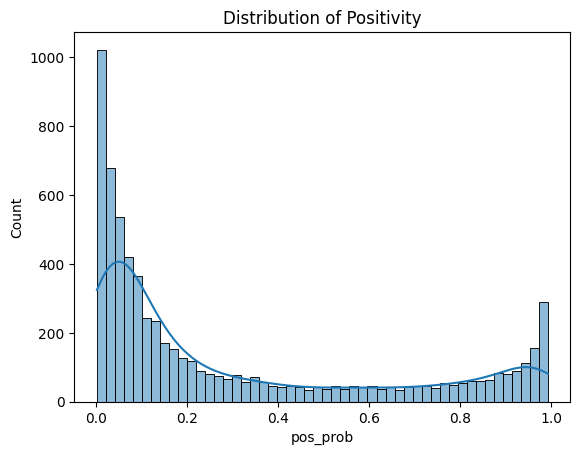

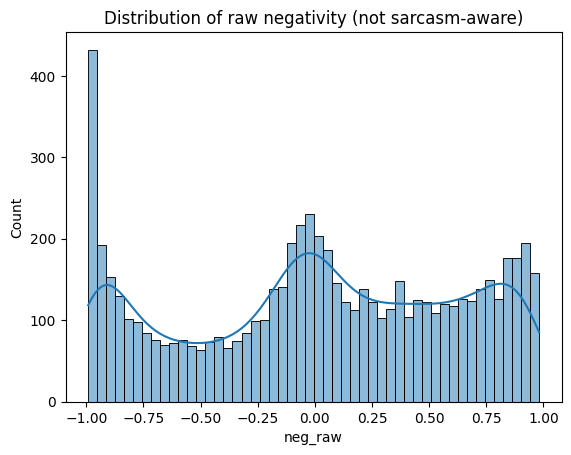

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(post_and_score_df["neg_effective"], bins=50, kde=True)
plt.title("Distribution of Negativity (sarcasm-aware)")
plt.show()

sns.histplot(post_and_score_df["pos_prob"], bins=50, kde=True)
plt.title("Distribution of Positivity")
plt.show()

sns.histplot(post_and_score_df["neg_raw"], bins=50, kde=True)
plt.title("Distribution of raw negativity (not sarcasm-aware)")
plt.show()

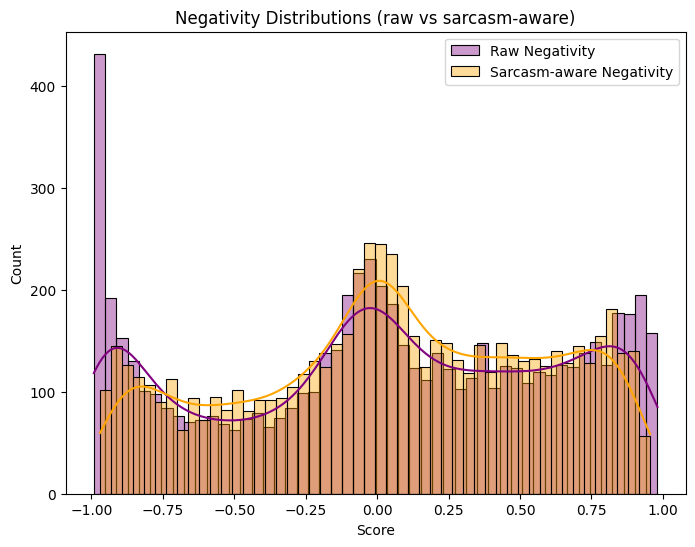

In [89]:
# overlaying neg raw with neg sarcasm aware in a histogram

plt.figure(figsize=(8,6))

sns.histplot(
    post_and_score_df["neg_raw"],
    bins=50, kde=True, color="purple", alpha=0.4, label="Raw Negativity"
)
sns.histplot(
    post_and_score_df["neg_effective"],
    bins=50, kde=True, color="orange", alpha=0.4, label="Sarcasm-aware Negativity"
)

plt.legend()
plt.title("Negativity Distributions (raw vs sarcasm-aware)")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

In [52]:
# rename columns for clarity
full_df = post_and_score_df.rename(columns={
    "neg_prob":         "negative_prob",
    "neu_prob":         "neutral_prob",
    "pos_prob":         "positive_prob",
    "sarcasm_prob":     "sarcasm_prob",
    "neg_raw":          "negative_raw",
    "neg_effective":    "neg_w_sarcasm",
    "text":              "full_post"
})

full_df.head()

,full_post,negative_prob,neutral_prob,positive_prob,sarcasm_prob,negative_raw,neg_w_sarcasm
0,the cat is under the covers with her are you k...,0.221770,0.611407,0.166823,0.071126,0.054947,0.059519
1,Welp. My 3 year old turned off my computer. Lo...,0.025228,0.075202,0.899570,0.048953,-0.874342,-0.841625
2,I love everything about this ridiculously big ...,0.007088,0.032331,0.960581,0.103234,-0.953493,-0.879188
3,Does this look like a strawberry roll shortcak...,0.355312,0.527494,0.117194,0.050018,0.238118,0.235379
4,I got tired of tracking down fruits and veg so...,0.020656,0.222478,0.756866,0.046406,-0.736209,-0.709362


In [56]:
old = pd.read_sql("SELECT * FROM posts", conn)
# add a new column to old that contains the full post (["title"] + ":\n" + ["body"])
old["full_post"] = old["title"] + ":\n" + old["body"]
merged = old.merge(full_df, on="full_post", how="left")

merged.head()

merged.to_sql("sentiment_scores", conn, if_exists="append", index=False)

6682

In [61]:
cols = [
    "negative_prob", "neutral_prob", "positive_prob",
    "sarcasm_prob", "negative_raw", "neg_w_sarcasm",
    "full_post", "date", "post_id"
]
df_out = merged[cols]

df_out.to_sql("sarcasm_sentiment_per_post", conn, if_exists="replace", index=False)
conn.execute("DROP TABLE IF EXISTS sentiment_scores;")


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_66927/628562345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"], unit="s")
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_66927/628562345.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


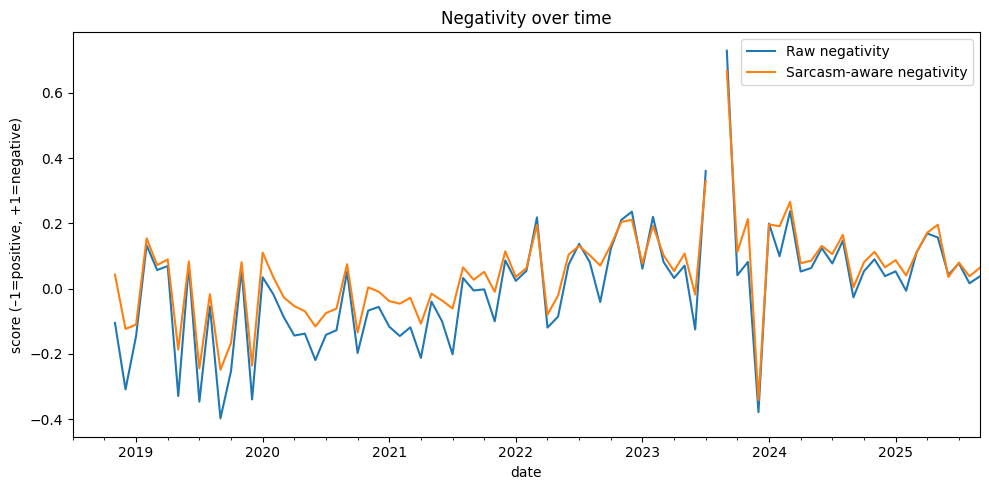

In [96]:
df = df_out

# make sure datetime is parsed
df["date"] = pd.to_datetime(df["date"], unit="s")

# resample by week (change 'W' → 'M' for monthly, 'D' for daily)
time_series = (
    df
    .set_index("date")[["negative_raw", "neg_w_sarcasm"]]
    .resample("M")
    .mean()
)

# plot both on the same axes
fig, ax = plt.subplots(figsize=(10, 5))
time_series["negative_raw"].plot(ax=ax, label="Raw negativity")
time_series["neg_w_sarcasm"].plot(ax=ax, label="Sarcasm-aware negativity")

ax.set_title("Negativity over time")
ax.set_ylabel("score (–1=positive, +1=negative)")
ax.legend()
plt.tight_layout()
plt.show()

# TODO: Talk about how we still see that big dip in 2024 right around when horse ranch was released. Also talk about how the sarcasm-aware negativity seems to follow a similar trend, but with more intensity for the most part. 